In [1]:
import numpy as np
import csv
import math
from scipy import integrate

with open("./2_dim.csv","r") as file:
    reader = csv.reader(file)
    data = [row for row in reader]
    del data[0]

    
data = np.array([[np.fromstring(row[0][1:-1], sep=' '), np.fromstring(row[1][1:-1], sep=' ')] for row in data], dtype=np.ndarray)

# n = len(data)
# # array1: init
# # array2: next
init_data = data[:,0].astype(float)
next_data = data[:,1].astype(float)


init_data[:5]




array([[1.48068611, 1.72934795],
       [1.97340953, 0.93882423],
       [2.40997158, 0.88336331],
       [1.38863031, 2.44581812],
       [0.69054023, 1.18833612]])

In [2]:
# calc std
std_init = np.std(init_data,axis=0,ddof=1)
# std_total_init = np.std(init_data,axis=0)

std_next = np.std(next_data,axis=0,ddof=1)

std_init,std_next

(array([0.85328408, 0.86371932]), array([0.3487415 , 0.43185966]))

In [3]:
d = 2
n = 100

In [4]:
# scott's rule
# Nonparametric and Semiparametric Models, by Wolfgang p104
h_init = (4/3/n)**(1/5)*std_init

h_next = (4/3/n)**(1/5)*std_next

h_init, h_next

(array([0.35981676, 0.36421714]), array([0.14705892, 0.18210857]))

In [5]:
xf = 1/(3*3)
init_data_transposed = init_data.transpose()
next_data_transposed = next_data.transpose()

In [6]:
# kerdenfunction

def kerdenfunction(x_point, y_point, x, xf, y, hx_cv, hy_cv):
    d = x.shape[0] # Generate the dimension of our study problem, x should be dxn
    n = x.shape[1]
    # print(d,n)
    
    f1 = 0
    for i_ker in range(n):
        f1 = f1 + ((n * np.prod(hx_cv) * np.prod(hy_cv))**(-1) * (2 * np.pi)**(-0.5*d) *
             np.prod(np.exp(-((x_point - x[:, i_ker]) / hx_cv)**2 / 2)) *
             np.prod(np.exp(-((y_point - y[:, i_ker]) / hy_cv)**2 / 2)))
    store = f1 / xf
    return store


In [7]:

kerdenfunction([1,2],[1,2],init_data_transposed, xf, next_data_transposed,h_init,h_next)

0.165718808320725

In [ ]:
import numpy as np
from scipy.integrate import dblquad
from itertools import product
import time

start_time = time.time()

def prob_density(x, y):
    return kerdenfunction(x,y,init_data_transposed,xf,next_data_transposed,h_init,h_next)   

# Define the number of divisions in each axis
nx = 10
ny = 10

# Define the range of x and y
x_min, x_max = 0, 3
y_min, y_max = 0, 3



# Calculate the range of each subdivision
x_range = np.linspace(x_min, x_max, nx+1)
y_range = np.linspace(y_min, y_max, ny+1)

# Store the probability value for each small area
prob_matrix = np.zeros((nx, ny, nx, ny))

interval = 10  # 打印时间的间隔，单位为秒
last_time = start_time


# Iterate over all small regions and calculate the probability of the probability density function within the small region
for i, j, k, l in product(range(nx), range(ny), range(nx), range(ny)):
    # Calculate the range of values for the current small area
    curr_x_range = (x_range[i], x_range[i+1])
    curr_y_range = (y_range[j], y_range[j+1])
    curr_xf = (curr_x_range[1] - curr_x_range[0]) * (curr_y_range[1] - curr_y_range[0])

    # Calculate the Le Berger integral
    prob_matrix[i, j, k, l] = dblquad(prob_density, curr_x_range[0], curr_x_range[1],
                                       lambda x: curr_y_range[0], lambda x: curr_y_range[1])[0] / curr_xf

    current_time = time.time()
    if current_time - last_time > interval:
        last_time = current_time
        elapsed_time = current_time - start_time
        print(f"Already running：{elapsed_time:.2f} seconds")

        
# Print results
print(prob_matrix)


Already running：11.50 seconds
Already running：22.29 seconds
Already running：32.66 seconds
Already running：42.68 seconds
Already running：53.85 seconds
Already running：63.88 seconds
Already running：75.20 seconds
Already running：86.87 seconds
Already running：98.98 seconds
Already running：109.61 seconds
Already running：119.98 seconds
Already running：131.03 seconds
Already running：143.12 seconds
Already running：153.96 seconds
Already running：164.35 seconds
Already running：175.08 seconds
Already running：185.37 seconds
Already running：196.18 seconds
Already running：207.66 seconds
Already running：218.62 seconds
Already running：228.92 seconds
Already running：239.04 seconds
Already running：249.67 seconds
Already running：259.87 seconds
Already running：270.14 seconds
Already running：280.90 seconds
Already running：292.17 seconds
Already running：302.78 seconds
Already running：314.31 seconds
Already running：325.58 seconds
Already running：337.80 seconds
Already running：347.87 seconds
Already running：3

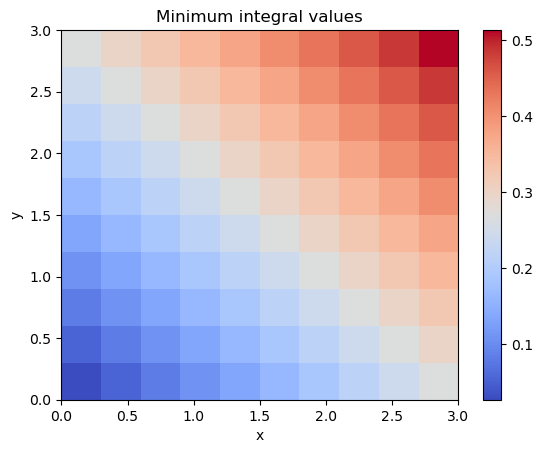

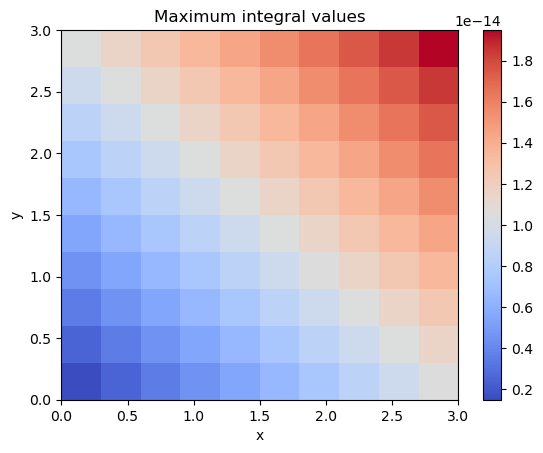

In [7]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt

def f(x, y):
    return kerdenfunction(x,y,init_data_transposed,xf,next_data_transposed,h_init,h_next)   


xmin, xmax = 0, 3
ymin, ymax = 0, 3
num_regions = 10
dx = (xmax - xmin) / num_regions
dy = (ymax - ymin) / num_regions

results = np.zeros((num_regions, num_regions, 2))  
for i in range(num_regions):
    for j in range(num_regions):
        x_range = (i*dx, (i+1)*dx)
        y_range = (j*dy, (j+1)*dy)
        min_val, max_val = dblquad(f, *x_range, *y_range)
        results[i,j] = (min_val, max_val)

# 
x = np.linspace(xmin, xmax, num_regions+1)
y = np.linspace(ymin, ymax, num_regions+1)
X, Y = np.meshgrid(x, y)
plt.pcolormesh(X, Y, results[:,:,0], cmap='coolwarm')
plt.colorbar()
plt.title('Minimum integral values')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.pcolormesh(X, Y, results[:,:,1], cmap='coolwarm')
plt.colorbar()
plt.title('Maximum integral values')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
